In [4]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
def imggen(img_path):
    img= mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

We start with
### linear regression

a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term)

y_hat= hθ (x) = θ· x  (model's prediction)
also equal to theta_transpose . x (matrix multiplication)

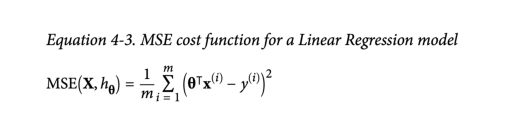

In [ ]:
imggen('lr_loss.png') # where h0 is the hypothesis function for the lr model

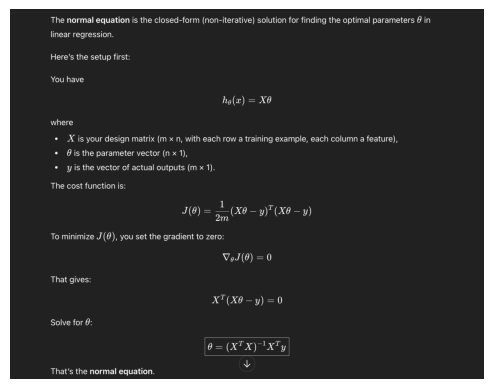

In [ ]:
imggen('normal equation.png')

# θ= inv(X⊺X). X⊺ .y

In [13]:
#generate a sequence
import numpy as np 
X=2*np.random.rand(100,1)
y=4+3*(X) + np.random.randn(100,1)

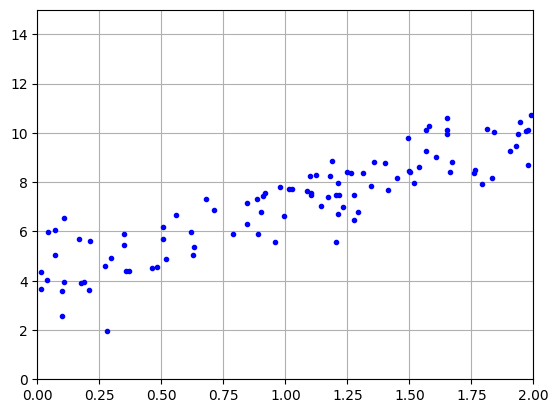

In [15]:
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [17]:
X_b= np.c_[np.ones((100,1)),X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
#we have ehe thetabest now we can get the prediction
X_new= np.array([[0],[2]])
X_new_b= np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.05368601],
       [10.06961107]])

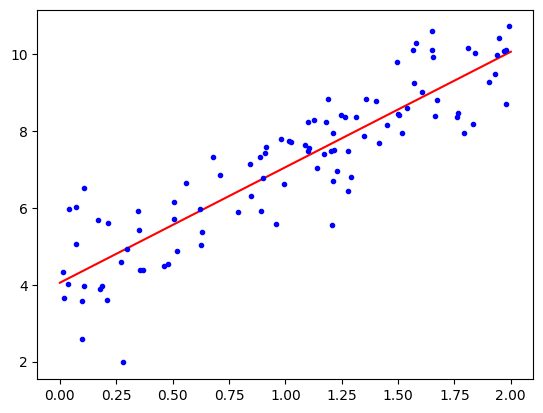

In [24]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.05368601]), array([[3.00796253]]))

In [26]:
lin_reg.predict(X_new)

array([[ 4.05368601],
       [10.06961107]])

The pseudoinverse is computed using Singular Value Decomposition (SVD), which decomposes the matrix X into U Σ V⊺. The pseudoinverse X+ is calculated as V Σ+ U⊺, where:


Σ+ is derived by:
Setting very small values in Σ to zero.
Replacing nonzero values with their inverse.
Transposing the resulting matrix.
This method is more efficient and robust than the Normal Equation, as it works even when X⊺X is non-invertible (e.g., when m < n or features are redundant).


this allows for direct calculation of the model's parameters but takes a lot of time to train, when scaled the computational complexity goes from O(n^2.5) to o(n^3) times 5.3-8, the SVD approach is o(n2). So for large number of features we go for gradient descent approach..

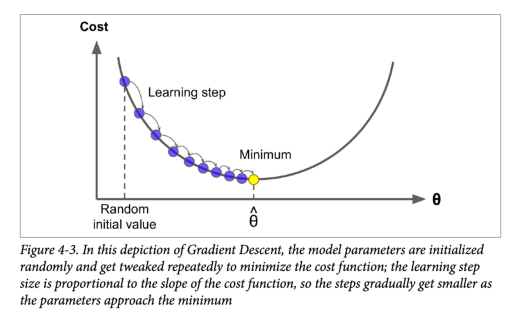

In [27]:
imggen('grad_desc.png')

the step size of the converge is taken in consideration with the learning rate hyperparameter, too small and it takes forever, too large and it deviates from the path to minima( other side even higher maybe)

### When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

the partial derivative has to be calculated for every feature at every instance, probably why its called batch grad desc.

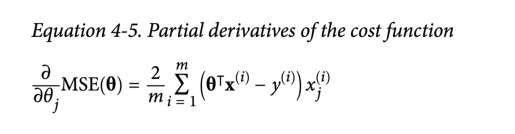

In [28]:
imggen('part_der.png')

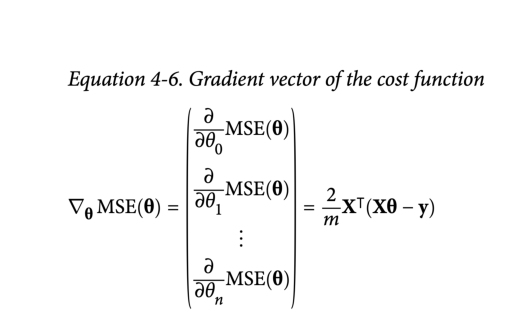

In [29]:
imggen('graddesc.png')

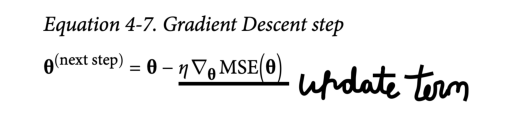

In [30]:
imggen('updatefunction.png')

for. any function f(x,y), the gradient is a vector that points in the direction of the 
#### steepest increase 
of that function, so the intuition is if we are going down a hill the gradient is the slope of the uphill. which is why we subtract it from the assumed initial weight(theta). So downhill is the direction of decreasing loss.

In [44]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    update= 2/m*(X_b.T).dot(X_b.dot(theta)-y)
    theta= theta- (eta*update)

In [45]:
theta

array([[4.05368601],
       [3.00796253]])

## SGD 
Batch Gradient Descent is slow for large datasets as it computes gradients using the entire training set, while Stochastic Gradient Descent (SGD) is faster by using one random instance at a time, making it suitable for large datasets.

 However, SGD is less stable, bouncing around the minimum and never fully settling. And so, the final parameters are good not optimal

 also sgd's randomness can get to optimal solutions more easily incase of irregular functions/
 to fix that we could try to reduce learning rate slowly as we go down( starting from a large value), the algorithm that defines the rate is called
##### learning schedule


In [ ]:
n_epochs=50
t0, t1= 5,50

def learning_schedule(t):
    return t0/(t+t1)
np.random.seed(42)
theta= np.random.randn(2,1)

for x in range(n_epochs):
    for i in range(m):
        random_index= np.random.randint(m)
        Xi=X_b[random_index: random_index+1]
        yi=y[random_index: random_index+1]# selecting an instance from random
        gradients= 2*Xi.T.dot(Xi.dot(theta)-yi)
        eta= learning_schedule(x*m + i)
        theta= theta- eta*gradients
        # plt.plot(theta )


theta


array([[4.0312799 ],
       [2.95490851]])

In [79]:
from sklearn.linear_model import SGDOneClassSVM, SGDRegressor
sgd_clf= SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0= 0.01)
sgd_clf.fit(X, y.ravel())


SGDRegressor(penalty=None)

In [80]:
sgd_clf.intercept_,sgd_clf.coef_

(array([3.67153206]), array([3.31918698]))

finally we have the MINI-BATCH GRADIENT DESCENT
we use batches of instances for calculation of every gradient( its like middle ground)

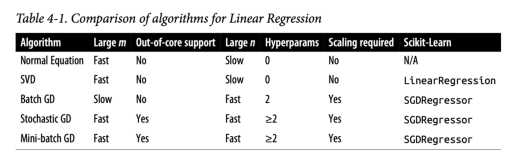

In [81]:
imggen('comparo.png')

In [82]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([-1.22434267])

In [85]:
X_poly[0]

array([-1.22434267,  1.49901497])

In [88]:
lin_reg= LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([2.2659028]), array([[1.07336874, 0.41715684]]))

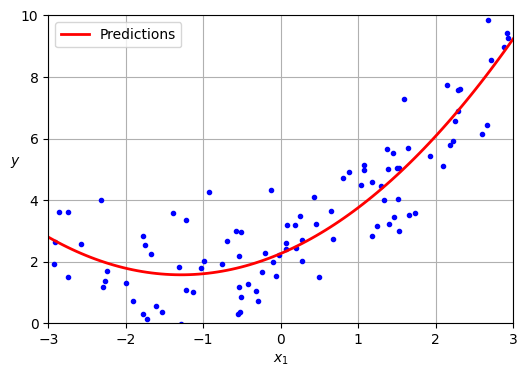

In [102]:
#this is the right code to get the plot as we need to create fresh-
# predictions from the trained linreg model and then plot them 

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
# save_fig("quadratic_predictions_plot")
plt.show()

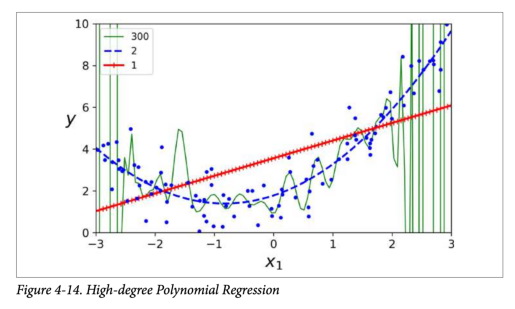

In [103]:
imggen('hdpr.png')

as we see the 300 polynomial is severly overfitting and linear is underfitting, quadratic fits best as the data was generated for quad,
but in general we won't know that.

in such cases,  If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting.
